<a href="https://colab.research.google.com/github/Tanmay-Malhotra/Advanced-statistics-simulation/blob/main/MME_and_ML_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
f = pd.read_excel('Dataset_Mark1.xlsx')
print(f)

(array([0.01322947, 0.03126966, 0.06614735, 0.08298486, 0.06013396,
        0.031871  , 0.01262813, 0.00240536]),
 array([161.1014558 , 164.42736355, 167.7532713 , 171.07917905,
        174.4050868 , 177.73099455, 181.0569023 , 184.38281005,
        187.7087178 ]),
 <BarContainer object of 8 artists>)

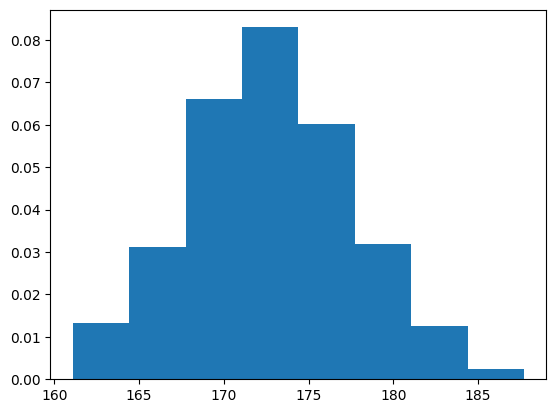

In [ ]:
import matplotlib.pyplot as plt

plt.hist(f['Height(in cms)'],bins=8,density=True)

# **Fitting a Normal Distribution -**

From the histogram, we can model the underlying distribution as a Normal Distribution with parameters $ \mu $ and $ \sigma^2 $.

# **Method of Moments Estimator :**

 Suppose $m_1$ and $m_2$ are the first and second moments of the samples.The method of moments estimates are obtained by solving :

$m_1$ = $ \mu $ --------------- (**1**)

$m_2$ = $ \mu^2 $ + $ \sigma^2 $ ------------ (**2**)

<br>
The solution results in :

$\hat{\mu}_{MME}$  =  $M_1$ (**Sample Mean**)

$\hat{\sigma^2}_{MME}$ = $M_2$  - $M_1^2$ (**Sample Variance**)

<br>
We now compute the values of $\hat{\mu}_{MME}$ ($m_1$)  and $\hat{\sigma^2}_{MME}$ ($m_2-m_1^2$) from the data.

In [ ]:
import numpy as np
array = np.array(f['Height(in cms)'])
mean_mme = np.average(array)
variance_mme = np.var(array)
std_mme = variance_mme ** 0.5
print(f'MM Estimate of Mean: {mean_mme}')
print(f'MM Estimate of Variance : {variance_mme}')
print(f'MM Estimate of Standard Deviation : {std_mme}')

MM Estimate of Mean: 172.75404453439998
MM Estimate of Variance : 23.546951313099385
MM Estimate of Standard Deviation : 4.852520099195817


We can plot the density curve of the Normal Distribution on top of the histogram to check if the MM Estimates gives a reasonable fit.

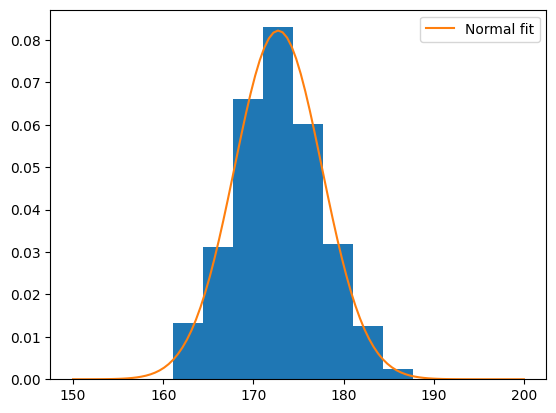

In [ ]:
from scipy.stats import norm

fig, ax = plt.subplots(1, 1)
ax.hist(array,density=True,bins=8)
xx = np.linspace(150, 200,100)
ax.plot(xx, norm.pdf(xx, loc=mean_mme, scale=std_mme),label='Normal fit')
ax.legend(loc='best')
plt.show()

# **Maximum Likelihood Estimator :**

We now turn to the maximum likelihood estimator for$ \mu $ and $ \sigma^2 $. The likelihood $L(x_1,\ldots,x_n)$ can be written as :

$L(\mu, \sigma | x_1, x_2, \ldots, x_n) = \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$

<br>
The logarithm of the given likelihood function is given by :


$\log L(\mu, \sigma | x_1, x_2, \ldots, x_n) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2$

<br>
Differentiating log of L with respect to $\mu$ and equating to zero, we get :

$ (1/\sigma^2) ( x_1+ x_2+ \ldots+ x_n - n\mu) $ = 0


$\hat{\mu}_{MLE} = ( x_1+ x_2+ \ldots+ x_n) / n $  (**Sample Mean**)

<br>
Differentiating log of L with respect to $\sigma^2$ and equating to zero, we get :

$-n +  (1/\sigma^2 ) \sum_{i=1}^{n}(x_i - \mu)^2 $ = 0

$\hat{\sigma^2}_{MLE} = \sum_{i=1}^{n}(x_i - \mu)^2 / n $ (**Sample Variance**)

In [ ]:
mean_mle = np.average(array)
variance_mle = np.var(array)
std_mle = variance_mle ** 0.5
print(f'ML Estimate of Mean: {mean_mle}')
print(f'ML Estimate of Variance : {variance_mle}')
print(f'ML Estimate of Standard Deviation : {std_mle}')

ML Estimate of Mean: 172.75404453439998
ML Estimate of Variance : 23.546951313099385
ML Estimate of Standard Deviation : 4.852520099195817


We now plot the density curve of Normal Distribution on top of the histogram to check if the ML Estimates are a good fit.

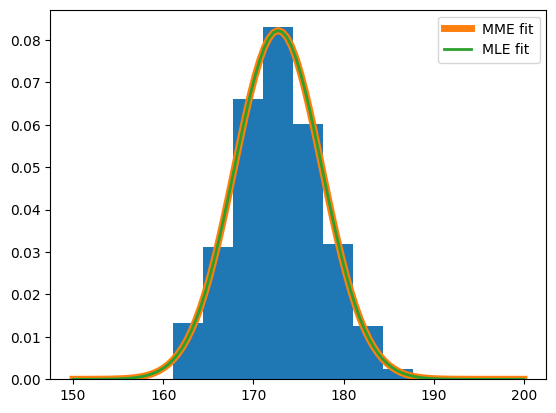

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(array,density=True,bins=8)
xx = np.linspace(150, 200,100)
ax.plot(xx,norm.pdf(xx, loc=mean_mme,scale=std_mme),lw='5',label='MME fit')
ax.plot(xx,norm.pdf(xx, loc=mean_mme,scale=std_mme),lw='2',label='MLE fit')
ax.legend(loc='best')
plt.show()

It is evident that the two curves overlap which indicates that the ML and MM Estimates are a good fit.

# Bootstrap Estimate of Standard Deviation :
How do we find the bias and variance of the estimator? Theoretical derivations of the sampling distributions may be too cumbersome and difficult in most cases. Bootstrap is a Monte Carlo simulation method for computing metrics such as bias, variance and confidence intervals for estimators.

In the above example, we have found $\hat{\alpha}_{MM}=172.754...$ and $\hat{\beta}_{MM}=23.547...$. Using these values, we simulate $n=500$ *iid* samples from Normal$(172.754...,23.547...)$ and, using the simulated samples, we compute new estimates of $\mu$ and $\sigma^2$ and call them $\hat{\mu}_{MM}(1)$ and $\hat{\sigma^2}_{MM}(1)$. Now, repeat the simulation $N$ times to get estimates $\hat{\sigma^2}_{MM}(i)$ and $\hat{\sigma^2}_{MM}(i)$, $i=1,2,\ldots,N$.

The sample standard deviation of $\{\hat{\mu}_{MM}(1), \hat{\mu}_{MM}(2),\ldots,\hat{\mu}_{MM}(N)\}$ is taken to be the bootstrap estimate for the standard deviation of the MME/MLE for mean.

In [ ]:
import scipy.stats as st
N = 1000
n = 500
alpha_hat = np.zeros(N)
beta_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.norm.rvs(mean_mme,scale=std_mme,size=n)
  m1i = np.average(xi); ssi = np.var(xi)
  alpha_hat[i] = m1i; beta_hat[i] = ssi

(array([0.01077102, 0.03111628, 0.09693917, 0.18191053, 0.26448834,
        0.26448834, 0.16994274, 0.10771018, 0.05146153, 0.0179517 ]),
 array([19.30582081, 20.14139639, 20.97697198, 21.81254756, 22.64812314,
        23.48369872, 24.3192743 , 25.15484988, 25.99042546, 26.82600104,
        27.66157662]),
 <BarContainer object of 10 artists>)

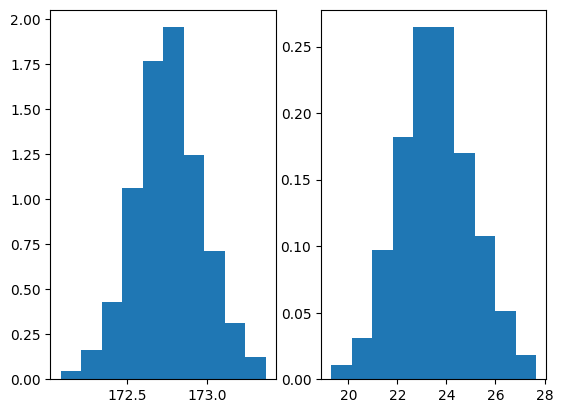

In [ ]:
ax1 = plt.subplot(121)
ax1.hist(alpha_hat,density=True)
ax2 = plt.subplot(122)
ax2.hist(beta_hat,density=True)

Notice, how the histograms look roughly normal.The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator.

In [ ]:
print(np.sqrt(np.var(alpha_hat)))
print(np.sqrt(np.var(beta_hat)))

0.21304330488807938
1.4650813236232034


## Confidence Intervals :
Suppose a parameter $\theta$ is estimated as $\hat{\theta}$, and suppose the distribution of $\hat{\theta}-\theta$ is known. Then, to obtain $(100(1-\alpha))$% confidence intervals (typical values are $\alpha=0.1$ for 90% confidence intervals and $\alpha=0.05$ for 95% confidence intervals), we use the CDF of $\hat{\theta}-\theta$ to obtain $\delta_1$ and $\delta_2$ such that
$$P(\hat{\theta}-\theta\le\delta_1)=1-\frac{\alpha}{2},$$
$$P(\hat{\theta}-\theta\le\delta_2)=\frac{\alpha}{2}.$$
Actually, the inverse of the CDF of $\hat{\theta}-\theta$ is used to find the above $\delta_1$ and $\delta_2$. From the above, we see that
$$P(\hat{\theta}-\theta \le \delta_1)-P(\hat{\theta}-\theta \le \delta_2)= P(\delta_2< \hat{\theta}-\theta \le \delta_1)=1-\frac{\alpha}{2}-\frac{\alpha}{2}=1-\alpha.$$
The above is rewritten as
$$P(\hat{\theta}-\delta_1\le\theta<\hat{\theta}-\delta_2)=1-\alpha,$$
and $[\hat{\theta}-\delta_1,\hat{\theta}-\delta_2]$ is interpreted as the $100(1-\alpha)$% confidence interval.

## Bootstrap Confidence Intervals :
The CDF of $\hat{\theta}-\theta$ might be difficult to determine in many cases, and the bootstrap method is used often to estimate $\delta_1$ and $\delta_2$. We consider the list of numbers $\{\hat{\mu}_{MM}(1)-172.754...,\ldots,\hat{\mu}_{MM}(N)-172.754...\}$ and pick the $100(\alpha/2)$-th percentile and $100(1-\alpha/2)$-th percentile.

In [ ]:
del1 = np.percentile(alpha_hat - mean_mme, 97.5)
del2 = np.percentile(alpha_hat - mean_mme, 2.5)
print([del1,del2])

[0.44364739293388583, -0.4426504610040844]


The 95% confidence interval for $\mu$ using the Method of Moments/Maximum Likelihood Functions estimator works out to : $[172.774-(0.44365),172.754-(-0.44265)]=[172.31035,173.19665]$.

Similarly, we consider the list of numbers $\{\hat{\sigma^2}_{MM}(1)-23.547...,\ldots,\hat{\sigma^2}_{MM}(N)-23.547...\}$ and pick the $100(\alpha/2)$-th percentile and $100(1-\alpha/2)$-th percentile.

In [ ]:
del1 = np.percentile(beta_hat - variance_mme, 97.5)
del2 = np.percentile(beta_hat - variance_mme, 2.5)
print([del1,del2])

[3.0197501359419445, -2.711427030564509]


The 95% confidence interval for $\sigma^2$ using the Method of Moments/Maximum Likelihood Functions estimator works out to : $[23.547-(3.01957),23.547-(-2.71143)]=[20.52743,26.25843]$.

<br>

*---- End ----*